# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 3  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 995/30000 [00:17<07:14, 66.68it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.480347
INFO:tensorflow:60.571 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.50
INFO:tensorflow:		 predicted_dist = 13.8 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 14.3 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.6 (0.3)
INFO:tensorflow:	 eval_time = 2.95


  7%|▋         | 1993/30000 [00:35<06:56, 67.29it/s]  

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 1.650815
INFO:tensorflow:72.503 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 15.8 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.80
INFO:tensorflow:		 predicted_dist = 16.7 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 18.2 (0.5)
INFO:tensorflow:	 eval_time = 2.24


 10%|▉         | 2994/30000 [00:53<07:24, 60.75it/s]

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.984959
INFO:tensorflow:69.621 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.20
INFO:tensorflow:		 predicted_dist = 14.6 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.40
INFO:tensorflow:		 predicted_dist = 16.8 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.8 (0.3)
INFO:tensorflow:	 eval_time = 2.86


 13%|█▎        | 3999/30000 [01:12<08:26, 51.35it/s]  

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.523352
INFO:tensorflow:66.245 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -15.80
INFO:tensorflow:		 predicted_dist = 15.8 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.20
INFO:tensorflow:		 predicted_dist = 17.8 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 18.5 (0.4)
INFO:tensorflow:	 eval_time = 2.71


 17%|█▋        | 4995/30000 [01:31<06:40, 62.44it/s]  

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.691933
INFO:tensorflow:66.055 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.40
INFO:tensorflow:		 predicted_dist = 13.3 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.10
INFO:tensorflow:		 predicted_dist = 16.5 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 17.9 (0.8)
INFO:tensorflow:	 eval_time = 2.68


 20%|█▉        | 5996/30000 [01:50<06:41, 59.80it/s]

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 2.213719
INFO:tensorflow:65.900 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.90
INFO:tensorflow:		 predicted_dist = 11.8 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.60
INFO:tensorflow:		 predicted_dist = 15.0 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.50
INFO:tensorflow:		 predicted_dist = 16.5 (0.9)
INFO:tensorflow:	 eval_time = 2.88


 23%|██▎       | 6998/30000 [02:10<06:11, 61.96it/s]  

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.442740
INFO:tensorflow:65.502 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -10.90
INFO:tensorflow:		 predicted_dist = 11.7 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.90
INFO:tensorflow:		 predicted_dist = 15.6 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 17.0 (0.6)
INFO:tensorflow:	 eval_time = 2.47


 27%|██▋       | 7996/30000 [02:29<05:44, 63.79it/s]

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 2.347340
INFO:tensorflow:66.461 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 10.5 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 13.0 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 16.4 (0.8)
INFO:tensorflow:	 eval_time = 1.99


 30%|██▉       | 8996/30000 [02:47<05:57, 58.68it/s]

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 2.798171
INFO:tensorflow:65.920 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 8.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 11.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.9 (1.1)
INFO:tensorflow:	 eval_time = 2.39


 33%|███▎      | 9999/30000 [03:06<06:33, 50.80it/s]

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 3.132313
INFO:tensorflow:65.354 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 6.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 10.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.70
INFO:tensorflow:		 predicted_dist = 13.9 (0.9)
INFO:tensorflow:	 eval_time = 2.41


 37%|███▋      | 10996/30000 [03:25<05:22, 59.00it/s]

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 3.424493
INFO:tensorflow:65.831 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 6.4 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 9.7 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.80
INFO:tensorflow:		 predicted_dist = 13.9 (1.3)
INFO:tensorflow:	 eval_time = 2.48


 40%|███▉      | 11994/30000 [03:44<04:58, 60.42it/s]

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 2.765825
INFO:tensorflow:65.504 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 6.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 8.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.70
INFO:tensorflow:		 predicted_dist = 12.8 (1.0)
INFO:tensorflow:	 eval_time = 1.93


 43%|████▎     | 12997/30000 [04:03<04:46, 59.40it/s]

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.814769
INFO:tensorflow:65.263 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 5.6 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.20
INFO:tensorflow:		 predicted_dist = 9.0 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 11.8 (1.3)
INFO:tensorflow:	 eval_time = 2.43


 47%|████▋     | 13994/30000 [04:22<04:38, 57.44it/s]

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.765282
INFO:tensorflow:64.796 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.50
INFO:tensorflow:		 predicted_dist = 6.0 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 8.6 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.50
INFO:tensorflow:		 predicted_dist = 11.8 (1.0)
INFO:tensorflow:	 eval_time = 2.25


 50%|████▉     | 14998/30000 [04:41<04:01, 62.24it/s]

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.820467
INFO:tensorflow:65.513 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 8.2 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 11.2 (1.4)
INFO:tensorflow:	 eval_time = 2.19


 53%|█████▎    | 15999/30000 [05:00<04:43, 49.36it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 3.274271
INFO:tensorflow:65.448 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 5.5 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.70
INFO:tensorflow:		 predicted_dist = 8.7 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 11.7 (1.3)
INFO:tensorflow:	 eval_time = 2.50


 57%|█████▋    | 16998/30000 [05:19<03:44, 57.92it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.739717
INFO:tensorflow:65.515 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 5.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 8.9 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 13.1 (0.9)
INFO:tensorflow:	 eval_time = 1.99


 60%|█████▉    | 17996/30000 [05:37<03:28, 57.51it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.811973
INFO:tensorflow:65.421 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 5.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.40
INFO:tensorflow:		 predicted_dist = 8.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 11.8 (2.2)
INFO:tensorflow:	 eval_time = 2.11


 63%|██████▎   | 18999/30000 [05:56<03:50, 47.83it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.042869
INFO:tensorflow:64.738 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.50
INFO:tensorflow:		 predicted_dist = 5.8 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 8.3 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 11.9 (1.5)
INFO:tensorflow:	 eval_time = 2.83


 67%|██████▋   | 19999/30000 [06:16<03:15, 51.05it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.037179
INFO:tensorflow:65.585 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 4.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 7.9 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.20
INFO:tensorflow:		 predicted_dist = 12.2 (1.5)
INFO:tensorflow:	 eval_time = 1.96


 70%|██████▉   | 20997/30000 [06:34<02:37, 57.21it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 2.736274
INFO:tensorflow:65.963 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 6.0 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.40
INFO:tensorflow:		 predicted_dist = 8.5 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.40
INFO:tensorflow:		 predicted_dist = 12.7 (1.6)
INFO:tensorflow:	 eval_time = 2.16


 73%|███████▎  | 21998/30000 [06:53<02:13, 60.05it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.078972
INFO:tensorflow:64.579 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 5.9 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 8.5 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.10
INFO:tensorflow:		 predicted_dist = 12.2 (2.6)
INFO:tensorflow:	 eval_time = 2.08


 77%|███████▋  | 22999/30000 [07:12<02:25, 47.97it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.219739
INFO:tensorflow:64.526 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 3.4 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 8.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 11.3 (2.0)
INFO:tensorflow:	 eval_time = 2.10


 80%|███████▉  | 23999/30000 [07:31<01:56, 51.48it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 2.764426
INFO:tensorflow:63.609 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.10
INFO:tensorflow:		 predicted_dist = 7.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 11.0 (1.1)
INFO:tensorflow:	 eval_time = 2.08


 83%|████████▎ | 24999/30000 [07:50<01:38, 50.74it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.088932
INFO:tensorflow:65.116 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 5.2 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 8.1 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 13.1 (2.1)
INFO:tensorflow:	 eval_time = 2.85


 87%|████████▋ | 25995/30000 [08:10<01:12, 55.47it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 2.682271
INFO:tensorflow:64.542 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 8.2 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 13.4 (1.2)
INFO:tensorflow:	 eval_time = 2.30


 90%|████████▉ | 26997/30000 [08:29<00:51, 57.87it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.831805
INFO:tensorflow:64.248 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 4.4 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.20
INFO:tensorflow:		 predicted_dist = 8.4 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 13.4 (1.3)
INFO:tensorflow:	 eval_time = 2.19


 93%|█████████▎| 27998/30000 [08:48<00:33, 59.71it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 2.603265
INFO:tensorflow:65.511 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 4.7 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 7.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 13.7 (1.7)
INFO:tensorflow:	 eval_time = 2.33


 97%|█████████▋| 28999/30000 [09:07<00:20, 48.79it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 2.907547
INFO:tensorflow:64.959 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.60
INFO:tensorflow:		 predicted_dist = 6.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 9.5 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 12.5 (1.0)
INFO:tensorflow:	 eval_time = 2.19


100%|█████████▉| 29997/30000 [09:25<00:00, 60.48it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-47-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.830472
INFO:tensorflow:65.433 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 5.6 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 9.1 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.70
INFO:tensorflow:		 predicted_dist = 13.0 (1.6)
INFO:tensorflow:	 eval_time = 2.06


100%|██████████| 30000/30000 [09:28<00:00, 52.80it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=2.8304725>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.52562934>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=2.3048432>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

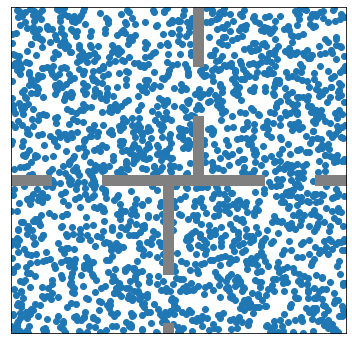

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

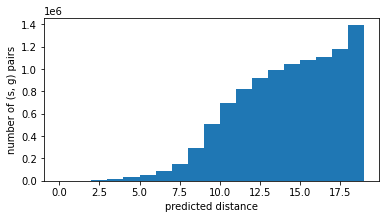

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 228 nodes and 2232 edges


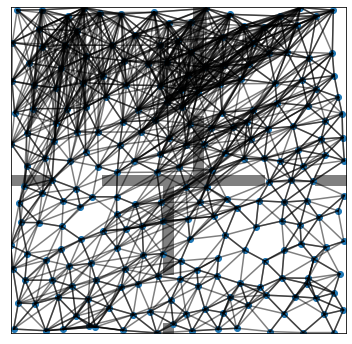

In [15]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 228 nodes and 1109 edges


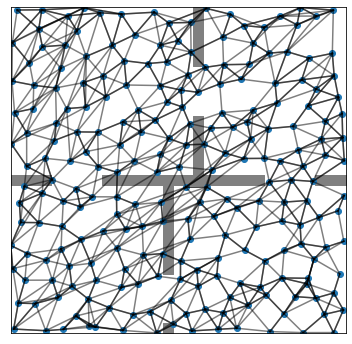

In [16]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 228 nodes and 898 edges


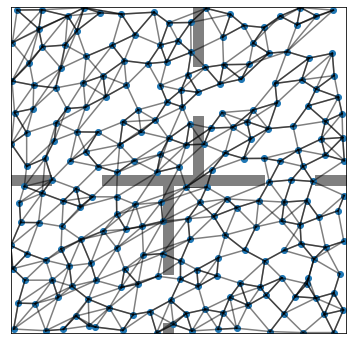

In [17]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 228 nodes and 679 edges


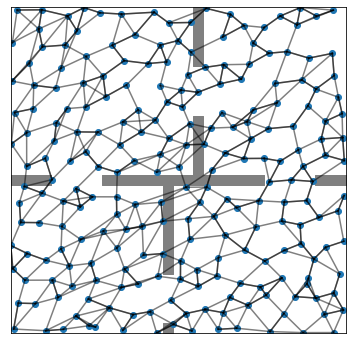

In [18]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 228 nodes and 455 edges


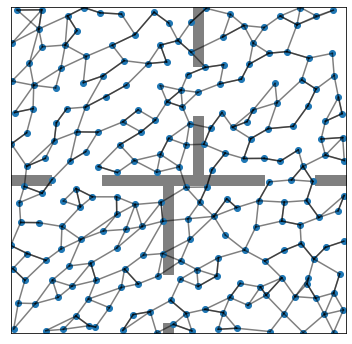

In [19]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 228 nodes and 228 edges


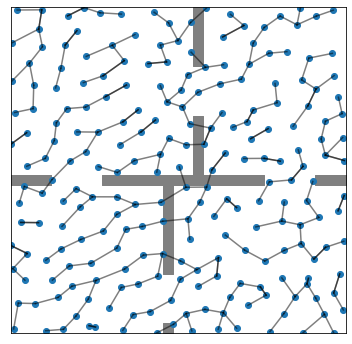

In [20]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

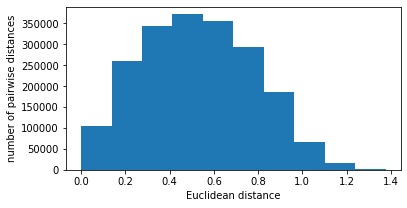

In [21]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [22]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [23]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.25
Evaluated initial SGM success rate in 604.30 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 1012.52 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.80
Took 5000 cleanup steps and evaluated SGM success rate in 834.65 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.90
Took 5000 cleanup steps and evaluated SGM success rate in 729.84 seconds
After filtering and 15000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 649.31 seconds
After filtering and 20000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 648.89 seconds
After filtering and 25000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 626.12 seconds
After filtering and 30000 cleanup steps, SGM has success rate 1.00
Took 5000 

In [ ]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 1.00
Evaluated initial SGM success rate in 160.86 seconds
After filtering and 0 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 599.59 seconds
After filtering and 5000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 616.90 seconds
After filtering and 10000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 617.40 seconds
After filtering and 15000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 620.68 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.95
Took 5000 cleanup steps and evaluated SGM success rate in 608.69 seconds
After filtering and 25000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 675.03 seconds
After filtering and 30000 cleanup steps, SGM has success rate 1.00
Took 5000 c

# Load cleanup graphs

In [ ]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

In [ ]:
plot_points(search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)